# Principal Component Analysis of c1 data set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline


In [4]:
# Silences pandas warning that ruin the display of the notebook on github
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [5]:
c1_stats = pd.read_csv('../notebooks/correlation_files/c1_stats.csv')

In [6]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
c1_stats_scaled = scaler.fit_transform(c1_stats)

In [7]:
pca = PCA()
pca.fit(c1_stats_scaled)

explained_variance = pca.explained_variance_ratio_

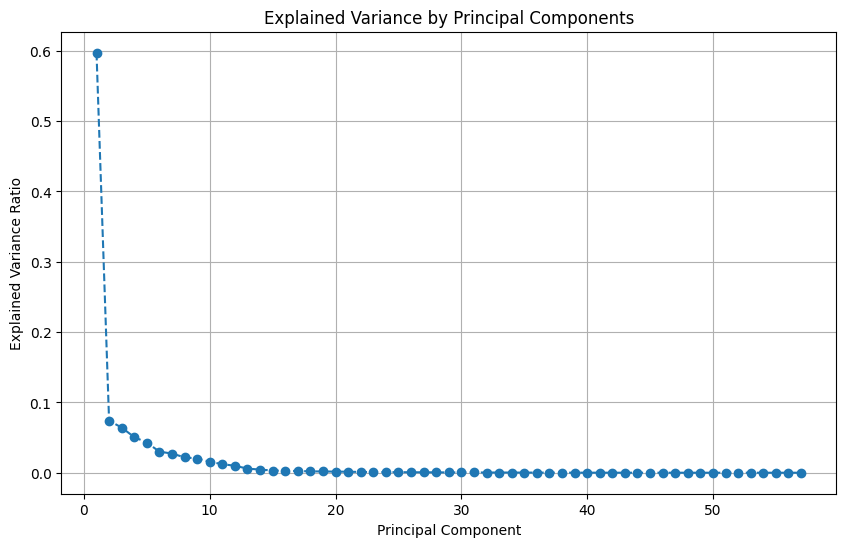

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [9]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
magic_n_components = np.argmax(cumulative_variance >= 0.9) + 1

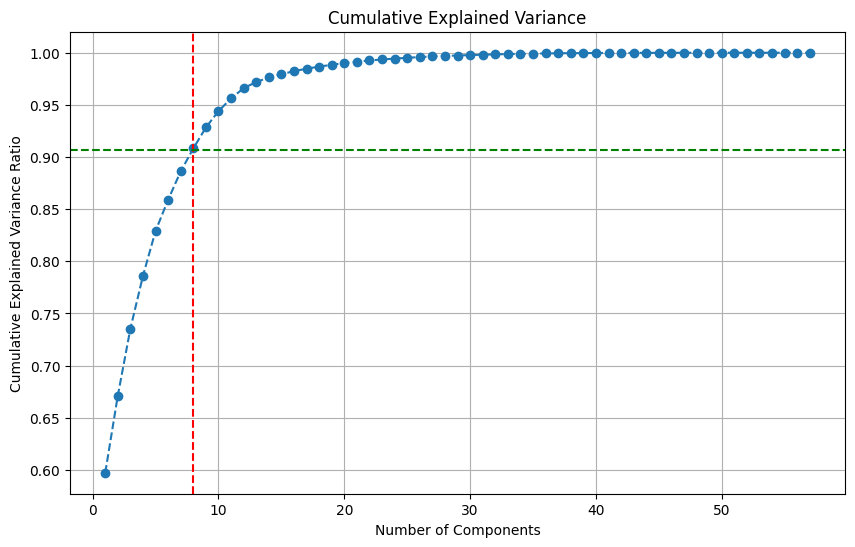

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axvline(x=magic_n_components, color='r', linestyle='--')  # Line at 95%
plt.axhline(y=0.907, color='g', linestyle='--')  # Line at 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [11]:
# Choose the number of components (for example, 8)
n_components = 7
pca = PCA(n_components=n_components)
c1_stats_pca = pca.fit_transform(c1_stats_scaled)

# Create a DataFrame for the PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components)]
c1_stats_pca_df = pd.DataFrame(data=c1_stats_pca, columns=pca_columns)

# Display the PCA results
c1_stats_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-9.047181,-8.509104,6.498912,15.032205,-6.021193,11.257324,-7.727207
1,-7.885520,-0.219053,-5.323530,1.197950,-2.608086,5.335428,4.064817
2,-7.210597,0.862799,-4.690308,0.377819,-2.792850,3.416643,3.065824
3,-6.939809,1.408137,-3.157463,1.443390,-2.309974,1.548879,3.818568
4,-7.190330,-0.310877,5.027846,9.485449,-1.779114,-3.093932,4.212301


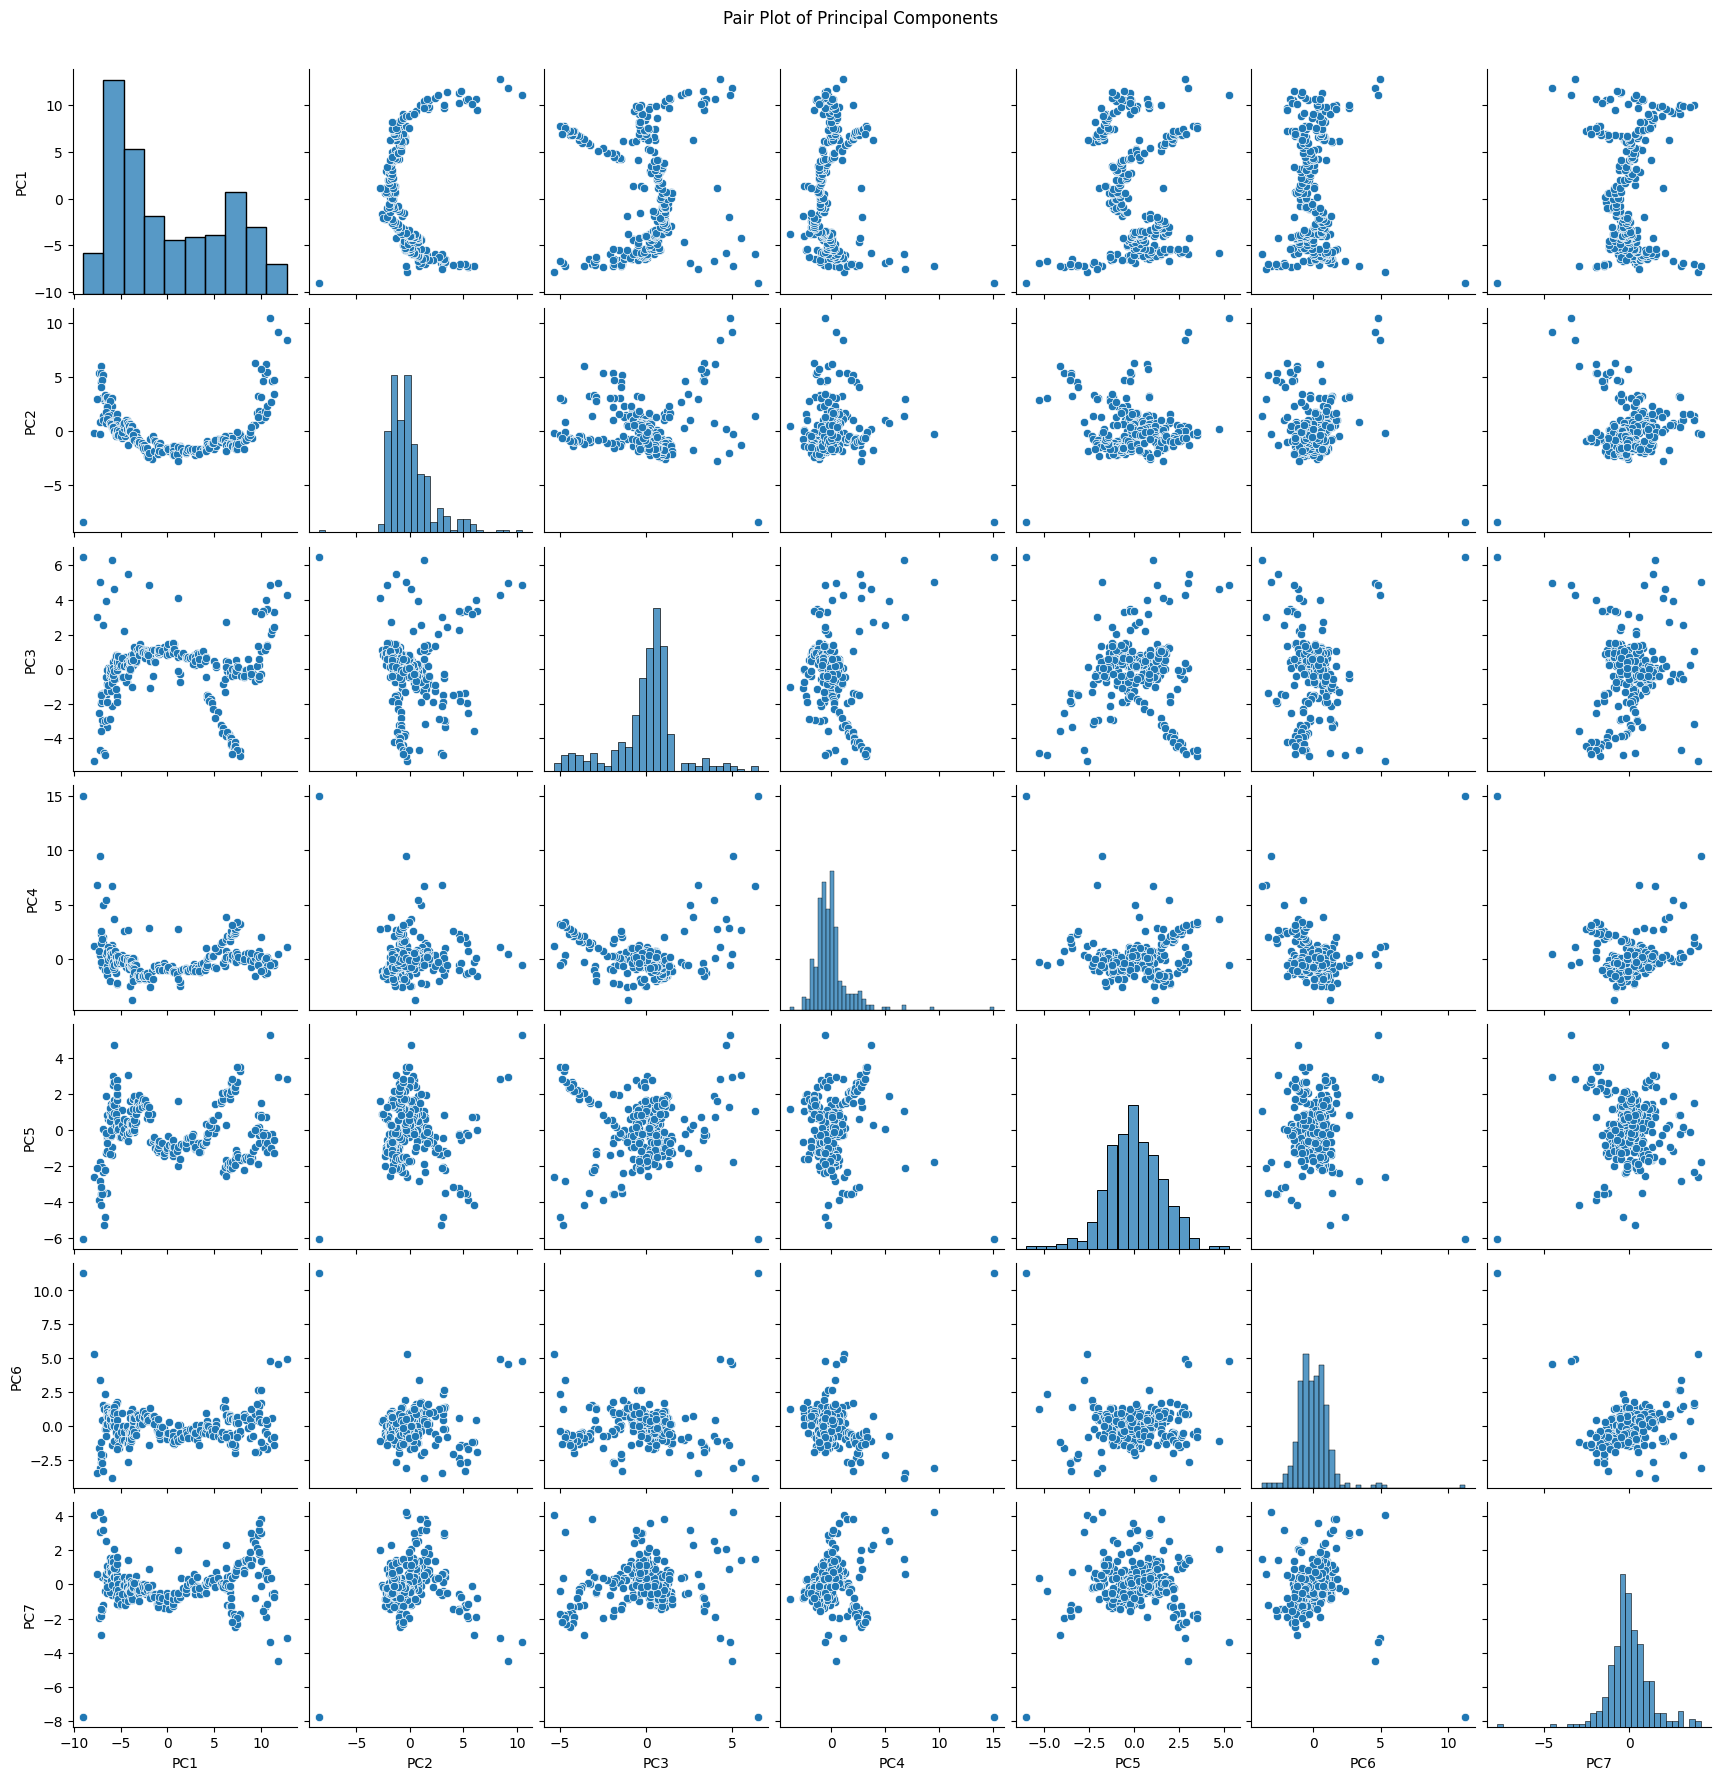

In [20]:
sns.pairplot(c1_stats_pca_df)
plt.suptitle('Pair Plot of Principal Components', y=1.02)
plt.show()

In [13]:
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=c1_stats.columns)

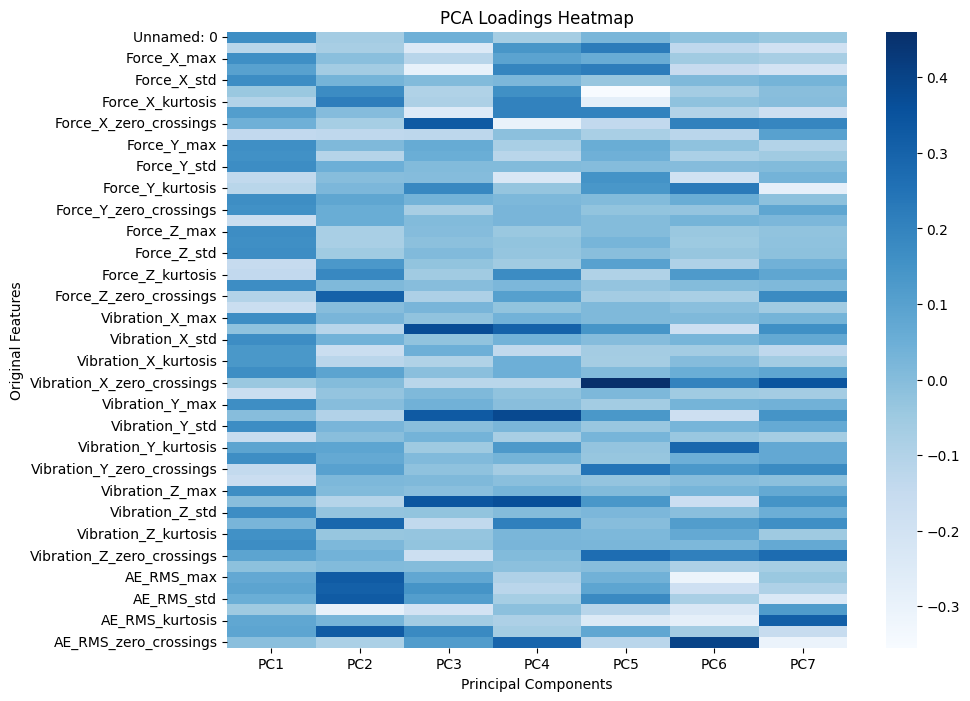

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='Blues', annot=False, fmt='.2f')
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

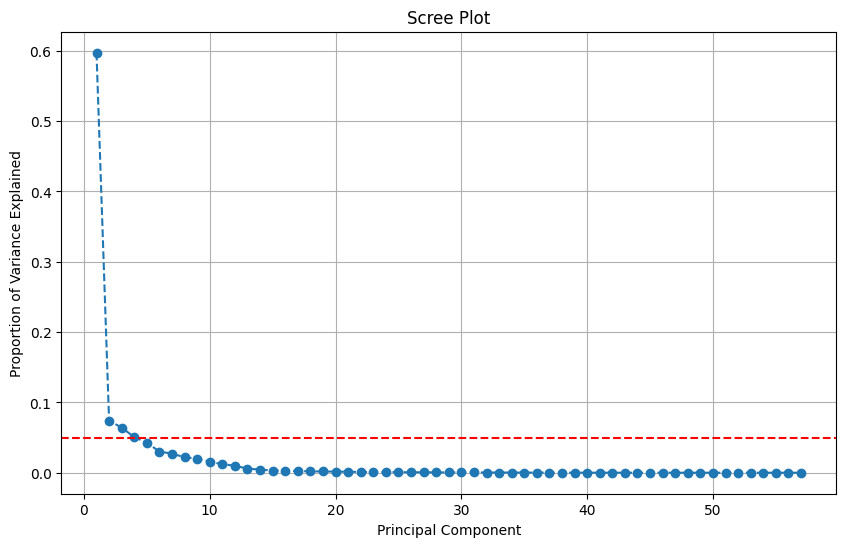

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.axhline(y=0.05, color='r', linestyle='--')
plt.show()

In [16]:
pc_index = 6
pc_loadings = pca.components_[pc_index]

loadings_df = pd.DataFrame({
    'Feature': c1_stats.columns,
    'Loading': pc_loadings
})

top_features = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index).head(10)

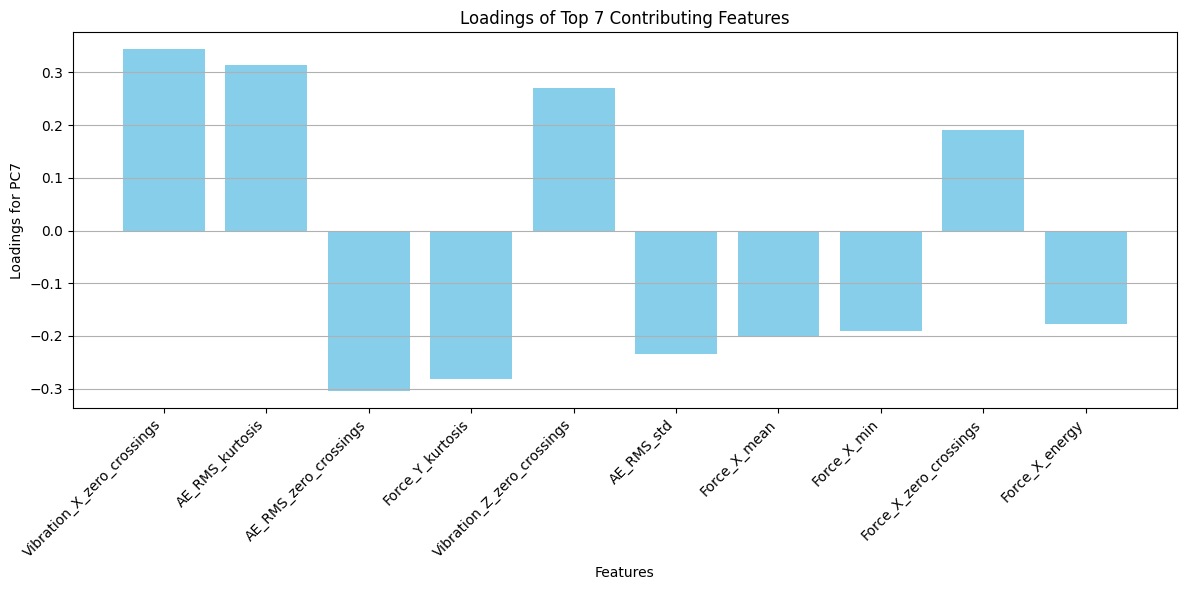

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(x=top_features['Feature'], height=top_features['Loading'], color='skyblue')
plt.xlabel('Features')
plt.ylabel(f'Loadings for PC{pc_index + 1}')
plt.title(f'Loadings of Top {pc_index + 1} Contributing Features')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()